<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [107]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go

In [109]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [110]:
query_3_1 = f'''select count(*) from vacancies
'''
quantity_of_vacancies = pd.read_sql_query(query_3_1, connection)

In [111]:
quantity_of_vacancies

,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [112]:
query_3_1 = f'''select count(*) from employers
'''
quantity_of_employers = pd.read_sql_query(query_3_1, connection)

/home/anna/.local/lib/python3.10/site-packages/pandas/io/sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



In [113]:
quantity_of_employers

,count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [114]:
query_3_1 = f'''select count(*) from areas
'''
quantity_of_areas = pd.read_sql_query(query_3_1, connection)

/home/anna/.local/lib/python3.10/site-packages/pandas/io/sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



In [115]:
quantity_of_areas

,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [116]:
query_3_1 = f'''select distinct count(*) from industries
'''
quantitof_industries = pd.read_sql_query(query_3_1, connection)

/home/anna/.local/lib/python3.10/site-packages/pandas/io/sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



In [117]:
quantitof_industries

,count
0,294


***

### <center> ПРЕДВАРИТЕЛЬНЫЙ АНАЛИЗ ДАННЫХ</center>

Рассматриваемая база данных представляет собой БД из 5 связанных между собой таблиц: 
* Вакансии, 
* Регионы (города где могут быть предоставлены вакансии), 
* Работодалети, 
* Сферы деятельности работодателей, 
* сферы деятельности.

Тип связи по ключам между таблицами: Сферы деятельности работодателей, сферы деятельности и работодатели - зависимая
Тип связи по ключа между таблицами: Вакансии, Регионы, Работодатели - не зависимая

База данных представляет собой базу в которой предоставлено   **49197**   вакансий, от   **23501**   работодателей в    **294**   сферах, в   **1362**   населенных пунктах

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [118]:
query_3_1 = f'''select count(v.id) as cnt, a.name as area
from vacancies as v
join areas as a ON a.id = v.area_id
group by a.name
order by count(v.id) desc
limit 5
'''
top_5_quantity_of_vacancies = pd.read_sql_query(query_3_1, connection)

/home/anna/.local/lib/python3.10/site-packages/pandas/io/sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



In [119]:
top_5_quantity_of_vacancies

,cnt,area
0,5333,Москва
1,2851,Санкт-Петербург
2,2112,Минск
3,2006,Новосибирск
4,1892,Алматы


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [120]:
query_3_1 = f'''select count(v.id)
from vacancies as v
where salary_from is not null or salary_to is not null or (salary_from is not null and salary_to is not null)
'''
salary_is_indicated = pd.read_sql_query(query_3_1, connection)

/home/anna/.local/lib/python3.10/site-packages/pandas/io/sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



In [121]:
salary_is_indicated

,count
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [122]:
query_3_1 = f'''select avg(v.salary_from) as "mean from", avg(salary_to) as "mean to"
from vacancies as v
'''
mean_salary_from_to = pd.read_sql_query(query_3_1, connection)

/home/anna/.local/lib/python3.10/site-packages/pandas/io/sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



In [123]:
mean_salary_from_to

,mean from,mean to
0,71064.657901,110536.741923


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [124]:
query_3_1 = f'''select schedule, employment, count(v.id) as quantity
from vacancies as v
group by schedule, employment
Order by count(v.id) desc
'''
schedule_emloyment = pd.read_sql_query(query_3_1, connection)


/home/anna/.local/lib/python3.10/site-packages/pandas/io/sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



In [125]:
schedule_emloyment

,schedule,employment,quantity
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [126]:
query_3_1 = f'''select experience, count(v.id) as quantity
from vacancies as v
group by experience
Order by count(v.id) 
'''
quantity_experience = pd.read_sql_query(query_3_1, connection)

/home/anna/.local/lib/python3.10/site-packages/pandas/io/sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



In [127]:
quantity_experience

,experience,quantity
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

### <center>Выводы по детальному анализу вакансий </center>

После анализа данных о вакансиях можно выделить 4 группы вакансий (более 1000 на сочетание)

Чаще всего работодатели предлагают работу на Полный день (Полный день-Полная занятость)
при этом на 1 месте присутсвенная работа, на 2 месте - 	Удаленная работа-Полная занятость

Более тысячи вакансий приходится и на сочетание: Гибкий график-Полная занятость и Удаленная работа-Частичная занятость

Работники с большим опытом (более 6 лет) наименее востребованы, это может быть связано с тем что таких сотрудников нужно меньше (руководящие должности, синиоры, лиды) а так же может быть связано с тем, что таким сотрудникам нужно предлагать более высокую заработную плату.

Как видно из данных самыми востребованными являются люди с опытом от 1 до 3 лет, менее востребованы работники с опытом 3-6 лет, далее идут люди без опыта работы и заключают список люди с опытом более 6 лет


Средняя предлагаемая зарплата колеблется между 71 тыс. руб. и 110,5 тыс. руб
На мой взгяд средняя зарплата не показательна, так как если мы посмотрим минимальные и максимальные значения данных колонок, можем увидеть что 
* минимальная зарплата от: 30 до: 60
* максимальная зарплата от: 1000000 до: 1000000
в данном случе рассмотреть медианную зарплату
которая составляет *ОТ* ** 50 тыс. руб.** *ДО* *80 тыс. руб.*



In [128]:
# дополнительно посмотрим на показатели зарплат "от" "до"
query = f'''select v.salary_from as "salary from", salary_to as "salary to"
from vacancies as v
'''
median_salary_from_to = pd.read_sql_query(query, connection)
median_salary_from_to.describe()

/home/anna/.local/lib/python3.10/site-packages/pandas/io/sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



,salary from,salary to
count,21485.000000,12690.000000
mean,71064.657901,110536.741923
std,56646.897132,89104.795997
min,30.000000,60.000000
25%,35000.000000,50000.000000
50%,50000.000000,80000.000000
75%,90000.000000,150000.000000
max,1000000.000000,1000000.000000


# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [129]:
query = f'''(select e.name as employers, count(v.employer_id) as "quantity of vacancies"
from vacancies as v
join employers as e on e.id = v.employer_id
group by e.name
order by count(v.employer_id) desc
limit 1 )
union
(select e.name as employers, count(v.employer_id) 
from vacancies as v
join employers as e on e.id = v.employer_id
group by e.name
order by count(v.employer_id) desc
offset 4
limit 1)
order by "quantity of vacancies" desc
'''
first_and_fifth_employers = pd.read_sql_query(query, connection)


/home/anna/.local/lib/python3.10/site-packages/pandas/io/sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



In [130]:
first_and_fifth_employers

,employers,quantity of vacancies
0,Яндекс,1933
1,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [131]:
query = f'''select a.name, count(e.id) as employes, count(v.id) as vacancies
from areas as a
left join vacancies as v on v.area_id = a.id
join employers as e on e.area = a.id
group by  a.name
having count(v.id) = 0
order by count(e.id) desc
limit 1
'''
employers_with_no_vacancies = pd.read_sql_query(query, connection)


/home/anna/.local/lib/python3.10/site-packages/pandas/io/sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



In [132]:
employers_with_no_vacancies

,name,employes,vacancies
0,Россия,410,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [133]:
query = f'''select e.name as employers, count(distinct v.area_id) as areas
from employers as e
join vacancies as v on e.id = v.employer_id
group by e.name
order by areas desc
'''
employers_vs_area = pd.read_sql_query(query, connection) 



/home/anna/.local/lib/python3.10/site-packages/pandas/io/sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



In [134]:
employers_vs_area 

,employers,areas
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14761,UniSol,1
14762,UNISTORY LLC,1
14763,UNIT6,1
14764,United Distribution,1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [135]:
query = f'''select count(e.name)
from employers as e
left join employers_industries as ei on ei.employer_id = e.id
where ei.industry_id is null
'''
employers_without_industry = pd.read_sql_query(query, connection) 


/home/anna/.local/lib/python3.10/site-packages/pandas/io/sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



In [136]:
employers_without_industry

,count
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [137]:
query = f'''select e.name, count(ei.industry_id)
from employers as e
join employers_industries as ei on ei.employer_id = e.id
group by e.name
having count(ei.industry_id) = 4
order by e.name
offset 2
limit 1
'''
employers_with_4_industry = pd.read_sql_query(query, connection) 

/home/anna/.local/lib/python3.10/site-packages/pandas/io/sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



In [138]:
employers_with_4_industry

,name,count
0,2ГИС,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [139]:
query = f'''select count(ei.employer_id)
from employers_industries as ei 
join industries as i on i.id = ei.industry_id
where i.name = 'Разработка программного обеспечения'
'''
employers_developers = pd.read_sql_query(query, connection) 


/home/anna/.local/lib/python3.10/site-packages/pandas/io/sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



In [140]:
employers_developers

,count
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [141]:
# код для получения списка городов-милионников
import requests
from bs4 import BeautifulSoup
import re
url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8' 
response = requests.get(url) 
page = BeautifulSoup(response.text, 'html.parser') 
city_string = page.find('table', class_='standard').text
cleaning_strin_result = re.findall('[А-Яа-я-\s]+', city_string)
city_list = cleaning_strin_result[12:]
city_list = [x for x in city_list if x != ' ']
city_list=tuple(city_list)
print(city_list)

('Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород', 'Челябинск', 'Красноярск', 'Самара', 'Уфа', 'Ростов-на-Дону', 'Омск', 'Краснодар', 'Воронеж', 'Пермь', 'Волгоград')


In [142]:
# текст запроса
query = f'''select a.name, count(v.id) as cnt
from areas as a
join vacancies as v on a.id = v.area_id 
join employers as e on v.employer_id = e.id
where e.name = 'Яндекс' and a.name in {city_list}
group by a.name

union
select 'total', count(v.id)
from areas as a
join vacancies as v on a.id = v.area_id 
join employers as e on v.employer_id = e.id
where e.name = 'Яндекс' and a.name in {city_list}
order by 2 desc
'''
employers_in_big_city = pd.read_sql_query(query, connection) 

/home/anna/.local/lib/python3.10/site-packages/pandas/io/sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



In [143]:
employers_in_big_city 

,name,cnt
0,total,485
1,Москва,54
2,Санкт-Петербург,42
3,Екатеринбург,39
4,Нижний Новгород,36
5,Новосибирск,35
6,Воронеж,32
7,Краснодар,30
8,Самара,26
9,Уфа,26


***

### <center>Для наглядности построим дополнительные графики</center>

In [144]:
#Топ 25 работодателей по количеству вакансий
query1 = f'''select e.name as employers, count(v.employer_id) as "quantity of vacancies"
from vacancies as v
join employers as e on e.id = v.employer_id
group by e.name
having count(v.employer_id)> 100
order by count(v.employer_id) desc
'''
first_and_fifth_employers2 = pd.read_sql_query(query1, connection)

fig1 = px.bar(first_and_fifth_employers2, y='employers', x='quantity of vacancies',
            title="Топ 25 работодателей по количеству вакансий")
fig1.show()

/home/anna/.local/lib/python3.10/site-packages/pandas/io/sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



![](https://raw.githubusercontent.com/danilovabg/Analisys_and_data_understanding_hh/master/pictures/top5_emoloyers_vs_vacancies.png)

![](https://raw.githubusercontent.com/danilovabg/Analysis-of-vacancies-from-HeadHunter/master/pictures/top5_emoloyers_vs_vacancies.png)

In [145]:
# Топ 15 работодателей по охвату регионов
query2 = f'''select e.name as employers, count(distinct v.area_id) as areas
from employers as e
join vacancies as v on e.id = v.employer_id
group by e.name
order by areas desc
limit 15
'''
employers_vs_area2 = pd.read_sql_query(query2, connection) 

fig2 = px.bar(employers_vs_area2, y='employers', x='areas',
            title="Топ 15 работодателей по охвату регионов")
fig2.show()

/home/anna/.local/lib/python3.10/site-packages/pandas/io/sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



![](https://raw.githubusercontent.com/danilovabg/Analisys_and_data_understanding_hh/master/pictures/top15_employers_by_area.png)

![](https://raw.githubusercontent.com/danilovabg/Analysis-of-vacancies-from-HeadHunter/master/pictures/top15_employers_by_area.png)

In [146]:
# 15 копмпаний по количеству сфер деятельности
query3 = f'''select e.name as employers, count(ei.industry_id) as industries
from employers as e
join employers_industries as ei on ei.employer_id = e.id
group by e.name
order by count(ei.industry_id) DESC
limit 15
'''
employers_with_4_industry2 = pd.read_sql_query(query3, connection) 
fig3 = px.bar(employers_with_4_industry2, y='employers', x='industries',
            title="Топ 15 копмпаний по количеству сфер деятельности")
fig3.show()

/home/anna/.local/lib/python3.10/site-packages/pandas/io/sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



![](https://raw.githubusercontent.com/danilovabg/Analisys_and_data_understanding_hh/master/pictures/top15_employers_by_industryes.png)

![](https://raw.githubusercontent.com/danilovabg/Analysis-of-vacancies-from-HeadHunter/master/pictures/top15_employers_by_industryes.png)

In [147]:
# сферы деятельности чаще всего встречающиеся у работодателей
query4 = f'''select i.name as industry, count(ei.employer_id) as employers
from employers_industries as ei 
join industries as i on i.id = ei.industry_id
group by i.name
order by count(ei.employer_id) desc
limit 15
'''
employers_developers2 = pd.read_sql_query(query4, connection) 

fig4 = px.bar(employers_developers2, y='industry', x='employers',
            title="Cферы деятельности чаще всего встречающиеся у работодателей")
fig4.show()

/home/anna/.local/lib/python3.10/site-packages/pandas/io/sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



![](https://raw.githubusercontent.com/danilovabg/Analisys_and_data_understanding_hh/master/pictures/most_offen_idustries.png)

![](https://raw.githubusercontent.com/danilovabg/Analysis-of-vacancies-from-HeadHunter/master/pictures/most_offen_idustries.png)

In [148]:
#Количество работодателей/ вакансий в регионе
query5 = '''select a2.name as city, count(v.id) as vacancies_qty, (select count(e.id) from areas as a join employers as e on e.area= a.id
where a.name = a2.name) as emoloyers_qty
from areas as a2
join vacancies as v on v.area_id= a2.id
where a2.name in ('Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород', 'Челябинск', 'Красноярск', 'Самара', 'Уфа', 'Ростов-на-Дону', 'Омск', 'Краснодар', 'Воронеж', 'Пермь', 'Волгоград')
group by a2.name'''

employers_vs_vacancies_at_cityes2 = pd.read_sql_query(query5, connection) 


fig5 = go.Figure()
fig5.add_trace(go.Bar(
    x=employers_vs_vacancies_at_cityes2['city'],
    y=employers_vs_vacancies_at_cityes2['vacancies_qty'],
    name='vacancies_qty',
    marker_color='blue'
))
fig5.add_trace(go.Bar(
    x=employers_vs_vacancies_at_cityes2['city'],
    y=employers_vs_vacancies_at_cityes2['emoloyers_qty'],
    name='emoloyers_qty',
    marker_color='green'
))

/home/anna/.local/lib/python3.10/site-packages/pandas/io/sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



![](https://raw.githubusercontent.com/danilovabg/Analisys_and_data_understanding_hh/master/pictures/qty_employers_vs_qty_vacancies.png)

![Количество работодателей/ вакансий в регионе](https://raw.githubusercontent.com/danilovabg/Analysis-of-vacancies-from-HeadHunter/master/pictures/qty_employers_vs_qty_vacancies.png)

In [149]:
employers_vs_vacancies_at_cityes2

,city,vacancies_qty,emoloyers_qty
0,Волгоград,456,107
1,Воронеж,1063,292
2,Екатеринбург,1698,609
3,Казань,1415,480
4,Краснодар,1301,409
5,Красноярск,847,331
6,Москва,5333,5864
7,Нижний Новгород,1670,426
8,Новосибирск,2006,573
9,Омск,617,210


### <center>Выводы по АНАЛИЗУ РАБОТОДАТЕЛЕЙ:</center>

Анализируя данные полученные в ходе запросов к базе и графиков, можем выделить <span style="color:orange">топ 5 областей (городов) где существует наибольшее количество вакансий</span>, это:

1. Москва
2. Санкт-Петербург
3. Минск
4. Новосибирск
5. Алматы

Можно обнаружить интересный факт: В <span style="color:orange">*Москве* </span>количество работодателей превышает количество вакансий
Во всех остальных городах мы наблюдаем обратное.
Из выборки можно обратить внимание на города: <span style="color:orange">*Новосибирск*, *Нижний Новгород*б *Екатебинбург*</span>
в этих городах количество вакансий значительно выше количества работодателей, что может указывать на то что в этих городах нахоятся крупные фирма/производства, которым нехватает большого количества сотрудников

<span style="color:orange">ТОП 3 СФЕР ДЕЯТЕЛЬНОСТИ компаний представленных в базе:</span>

1. Разработка ПО
2. Системная интеграция, автоматизация технологических и бизнес-процессов, ИТ-консалтинг
3. Интернет-компании (поисковики, платежные системы, соц.сети, информационно-познавательные и развлекательные ресурсы и т.д.)

из графика видно что <span style="color:orange">***наибольшее количество компаний ищущих сотрудников работают в сфере ИТ или близкой к ней***</span>
     
Компания с самым широким охватом сфер деятельности - "Модуль" - 16 видов деятельности.
Компании: "Простые решения", "Энергия" и "Прайд" так же ведут ширкий спектр деятельности


Можем отметить компании работающие в более чем 100 регионах (городах и населенных пунктах). 

Самый большой охват территорий у компании "Яндекс", чуть меньший у "Ростелекома" и "Спецремонта", можем сделать вывод что это или компании которые на зависят от физического местоположения работника или имеющие офисы в регионах


Так же мы обнаружили <span style="color:orange">пропуски в данных</span>
Так например 
+ у 8419 работодателей не указана сфера деятельности
+ у 410 работодателей не указан регион

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [150]:
query = f'''select count(v.name)
from vacancies as v 
WHERE lower(v.name) LIKE '%data%' or lower(v.name) LIKE '%данн%'
'''
data_vacancies = pd.read_sql_query(query, connection) 

/home/anna/.local/lib/python3.10/site-packages/pandas/io/sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



In [151]:
data_vacancies

,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [152]:
query = f'''select v.name
from vacancies as v 
WHERE (lower(v.name) LIKE '%data scientist%' 
or lower(v.name) LIKE '%data science%' 
or lower(v.name) LIKE '%исследователь данных%'
or (v.name LIKE '%ML%' and v.name not LIKE '%HTML%')
or lower(v.name) LIKE '%machine learning%' 
or lower(v.name) LIKE '%машинн%обучен%%') 
and (v.employment = 'Стажировка' or v.experience = 'Нет опыта' or lower(v.name) LIKE '%junior%')
'''
ds_junior = pd.read_sql_query(query, connection) 

/home/anna/.local/lib/python3.10/site-packages/pandas/io/sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



In [153]:
ds_junior.shape

(51, 1)

3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [154]:
query = f'''select count(v.name)
from vacancies as v 
WHERE (lower(v.name) LIKE '%data scientist%' 
or lower(v.name) LIKE '%data science%' 
or lower(v.name) LIKE '%исследователь данных%'
or (v.name LIKE '%ML%' and v.name not LIKE '%HTML%')
or lower(v.name) LIKE '%machine learning%' 
or lower(v.name) LIKE '%машинн%обучен%%') 
and (v.key_skills LIKE '%SQL%' or lower(v.key_skills) LIKE '%postgres%')
'''
ds_sql_postgres = pd.read_sql_query(query, connection) 


/home/anna/.local/lib/python3.10/site-packages/pandas/io/sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



In [155]:
ds_sql_postgres

,count
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [156]:
query = f'''select count(v.name)
from vacancies as v 
WHERE (lower(v.name) LIKE '%data scientist%' 
or lower(v.name) LIKE '%data science%' 
or lower(v.name) LIKE '%исследователь данных%'
or (v.name LIKE '%ML%' and v.name not LIKE '%HTML%')
or lower(v.name) LIKE '%machine learning%' 
or lower(v.name) LIKE '%машинн%обучен%%') 
and v.key_skills LIKE '%Python%'
'''
ds_python = pd.read_sql_query(query, connection) 

/home/anna/.local/lib/python3.10/site-packages/pandas/io/sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



In [157]:
ds_python

,count
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [158]:
query = f'''select  AVG(CHAR_LENGTH(v.key_skills ) - CHAR_LENGTH(replace(v.key_skills, E'\t', ''))+1)
from vacancies as v 
WHERE (lower(v.name) LIKE '%data scientist%' 
or lower(v.name) LIKE '%data science%' 
or lower(v.name) LIKE '%исследователь данных%'
or (v.name LIKE '%ML%' and v.name not LIKE '%HTML%')
or lower(v.name) LIKE '%machine learning%' 
or lower(v.name) LIKE '%машинн%обучен%%') 
'''
ds_key_skills = pd.read_sql_query(query, connection) 

/home/anna/.local/lib/python3.10/site-packages/pandas/io/sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



In [159]:
round(ds_key_skills, 2)

,avg
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа.   

In [160]:
query = f'''select AVG((coalesce(v.salary_from, 0) + coalesce(v.salary_to, 0))/ (CASE
    WHEN v.salary_from is null and v.salary_to is not null
        THEN 1
    WHEN v.salary_from is not null and v.salary_to is null
        THEN 1
    ELSE  2
    END )) as salary

from vacancies as v 
WHERE (lower(v.name) LIKE '%data scientist%' 
or lower(v.name) LIKE '%data science%' 
or lower(v.name) LIKE '%исследователь данных%'
or (v.name LIKE '%ML%' and v.name not LIKE '%HTML%')
or lower(v.name) LIKE '%machine learning%' 
or lower(v.name) LIKE '%машинн%обучен%%') 
and v.experience = 'От 3 до 6 лет'
and (v.salary_from is not null or v.salary_to is not null)
group by v.experience
'''
ds_mean_salary_3_6 = pd.read_sql_query(query, connection) 
ds_mean_salary_3_6


/home/anna/.local/lib/python3.10/site-packages/pandas/io/sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



,salary
0,243114.666667


In [161]:
query = f'''select v.experience, AVG((coalesce(v.salary_from, 0) + coalesce(v.salary_to, 0))/ (CASE
    WHEN v.salary_from is null and v.salary_to is not null
        THEN 1
    WHEN v.salary_from is not null and v.salary_to is null
        THEN 1
    ELSE  2
    END )) as salary

from vacancies as v 
WHERE (lower(v.name) LIKE '%data scientist%' 
or lower(v.name) LIKE '%data science%' 
or lower(v.name) LIKE '%исследователь данных%'
or (v.name LIKE '%ML%' and v.name not LIKE '%HTML%')
or lower(v.name) LIKE '%machine learning%' 
or lower(v.name) LIKE '%машинн%обучен%%') 
and (v.salary_from is not null or v.salary_to is not null)
group by v.experience
'''
ds_mean_salary = pd.read_sql_query(query, connection) 
ds_mean_salary

/home/anna/.local/lib/python3.10/site-packages/pandas/io/sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



,experience,salary
0,Нет опыта,74642.857143
1,От 1 года до 3 лет,139674.750000
2,От 3 до 6 лет,243114.666667


***

/home/anna/.local/lib/python3.10/site-packages/pandas/io/sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy

/home/anna/.local/lib/python3.10/site-packages/pandas/io/sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



<AxesSubplot:title={'center':'Average salary for DS and other VS experience'}, xlabel='experience'>

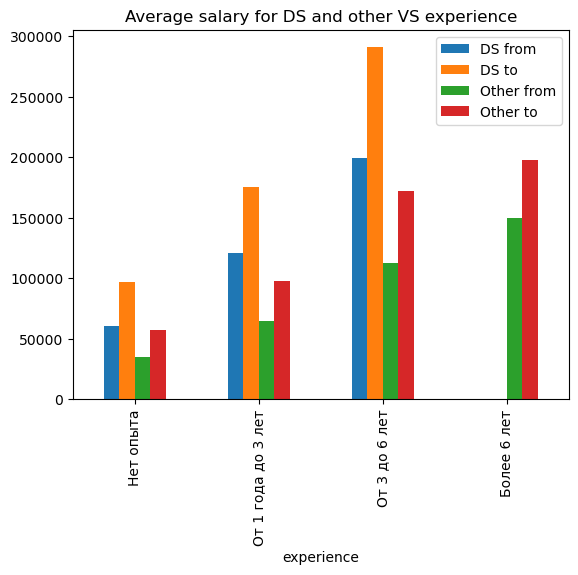

In [171]:
query = f'''select v.experience, avg(v.salary_from) as "DS from", avg(v.salary_to) as "DS to"

from vacancies as v 
WHERE (lower(v.name) LIKE '%data scientist%' 
or lower(v.name) LIKE '%data science%' 
or lower(v.name) LIKE '%исследователь данных%'
or (v.name LIKE '%ML%' and v.name not LIKE '%HTML%')
or lower(v.name) LIKE '%machine learning%' 
or lower(v.name) LIKE '%машинн%обучен%%') 
and (v.salary_from is not null or v.salary_to is not null)
group by v.experience
order by 2
'''
all_ds_salary = pd.read_sql_query(query, connection) 
all_ds_salary

query = f'''select v.experience, avg(v.salary_from) as "Other from", avg(v.salary_to) as "Other to"

from vacancies as v 
WHERE (lower(v.name) not LIKE '%data scientist%' 
or lower(v.name) not LIKE '%data science%' 
or lower(v.name) not LIKE '%исследователь данных%'
or (v.name not LIKE '%ML%' and v.name LIKE '%HTML%')
or lower(v.name) not LIKE '%machine learning%' 
or lower(v.name) not LIKE '%машинн%обучен%%') 
and (v.salary_from is not null or v.salary_to is not null)
group by v.experience
order by 2
'''
all_not_ds_salary = pd.read_sql_query(query, connection) 
all_not_ds_salary
merged = all_ds_salary.merge(all_not_ds_salary, on='experience', how = 'right')
merged[['experience', 'DS from', 'DS to', 'Other from', 'Other to']].plot(x='experience', 
                                                                          kind='bar', 
                                                                          title = 'Average salary for DS and other VS experience')

### Вывод по предметному анализу
В данной Базе присутсвует большое количество вакансий так или иначе связанных с данными, их оказалось **1771**, из которых мы выделили **51** вакансию подходящую начинающих Дата Сайентистов - Джуниор позиции, должности для людей без опыта и предлагаемые стажировки. 

В базе находится **480** вакансий в которых встречаются слова: "data scientist", "data science", "исследователь данных", "ML", "machine learning", "машинн..обучен.." - из них у **201** есть требования в ключевых навыках - владение SQL и PostgreSQL, то есть <span style="color:orange">в 42% вакансий для дата сайентистов указывается требование знаний SQL и PostgreSQL</span>


<span style="color:orange">Среднее количество ключевых навыков - 6.4 </span> среди которых не только Хард скилс, но и Софт скиллс как например "умение работать в команде"

Из данных мы можем видеть, что работодатели часто не указывают зарплату, однако если возмем во внимание позиции для Дата Сайентистов в которых указана зарплата, то 

<span style="color:orange">в начале своей карьеры кандидат может получать в среднем  75 т.р., </span>

<span style="color:orange">с опытом от года: 140 т.р., </span>

<span style="color:orange">с опытом больше 3 лет уже 243 тыс. руб.</span>

Так же можем отметить что в базе нет вакансий для Дата Сайентистов с опытом более 6 лет, возможно это связано с тем, что это специальность достаточно новая, специалисты с таким опытом встречаются не часто.

На графике предлагамой зарплаты в зависимости от опыта, можем видеть что зарплаты для сферы Дата Сайенс выше средних.

Так же видим корреляцию - при увеличении опыта - предлагаемая зарплата растет.


# Общий вывод по проекту

### <center>Подведение итогов </center>

База представляет собой структуру состоящуюи из 5 таблиц с реляционными связями.
В данной базе находится 49197 вакансий от 23501 работодателей в 1362 регионах в 294 сферях деятельности.


Подведя итоги можно отметить что <span style="color: orange;">работодатели заинтересованы в сотрудниках </span>
+ на Полный рабочий день (присутственно или удаленно);
+ с оптом от 1 до 3 лет; 
+ и средней зарплатой от 71 до 110 тыс.руб.

<span style="color: orange;">**Ожидаемос что городами с самым большим количеством вакансий оказались**:</span>
1. Москва
2. Санкт-Петербург
3. Минск
4. Новосибирск
5. Алматы

<span style="color: orange;">**Самые востребованные сферы деятельности: связаны с IT сектором**</span>


Компания с самым широким спектром деятельности: "Модуль", "Простые решения", "Энергия" и "Прайд" 


У компаний "Яндекс" и "Ростелеком" - самой большой охват по территориям


<span style="color: orange;">Профессия Дата Сайенс - одна из высокооплачиваемых профессий</span>, которая требует в среднем 6 развитых умений связанных с данной сферой.
С увеличением опы

*Для дальнейшей работы с данными*

*Необходимо произвести очистку и дальнейшую подготовку данных:*
*Оистить базу от пропусков (нулевые значения) - например очень частоо не указан род деятельности компании, ее регион.*
*Поработать с выбросами, так например указанная зарплата 30 или 60 руб - это точно ошибка, как и зарплаты равные миллиону руб.*


После этого можно поискать зависимость данных в базе резюме и соотнести их с данными в базе работодателей

